In [1]:

# !pip install translate

In [24]:

import cv2 
import sklearn
import numpy 
import os 
import matplotlib.pyplot as plt
import mediapipe as medpip

from essentials import get_feed,get_dots,get_dot

from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical as encode
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense,SimpleRNN
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score



from translate import Translator
from win32com.client import Dispatch
import pickle
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")


In [3]:
holistic_model = medpip.solutions.holistic
draw_model = medpip.solutions.drawing_utils 

In [6]:
holistic_model.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

#### testing if everything works fine

In [7]:
# press Q to break
vis = cv2.VideoCapture(0)
with holistic_model.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as h_model:
    while vis.isOpened():

            # Read feed
        k, image = vis.read()

        image, out = get_feed(image, h_model)
        print(out)
        
        get_dots(image,out)
            # Show to screen
        cv2.imshow('screen',image)

            # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    vis.release()
    cv2.destroyAllWindows() 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
vis.release()

cv2.destroyAllWindows() 

#### creating paths

In [10]:
address = os.path.join('newdata') 

signs = numpy.array(['salute','ok' ,'love you','come','Namsate','Gracious','You','Me'])

videos,fps,home =30,30,30

### LSTM

In [11]:
lstm = Sequential()
lstm.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
lstm.add(LSTM(128, return_sequences=True, activation='relu'))
lstm.add(LSTM(64, return_sequences=False, activation='relu'))
lstm.add(Dense(64, activation='relu'))
lstm.add(Dense(32, activation='relu'))
lstm.add(Dense(signs.shape[0], activation='softmax'))

In [12]:
lstm.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [13]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
Total params: 596840 (2.28 MB)
Trainable params: 596840 

In [14]:
lstm.load_weights("D:/Python/motion/motion sign language detection/motion sign language detection/8signsworkfine.h5")

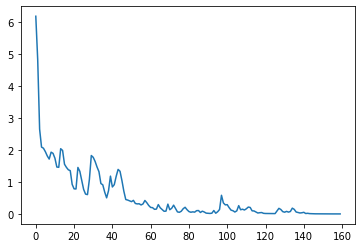

In [26]:
# dont run this

plt.plot(history.history['loss'])

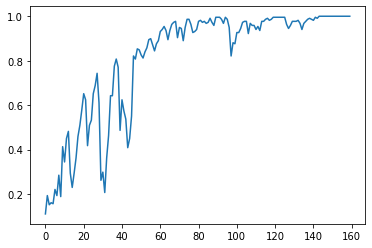

In [27]:
# don't runt his
plt.plot(history.history['categorical_accuracy'])

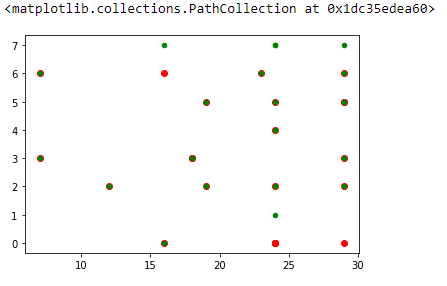

In [4]:
# green is actual value and orange is predicted value
Image(filename='LSTM_scatterplot.png') 

#### LSTM Accuracy

In [5]:
#don't run this
accuracy_score(ytrue, y_new)

0.84

In [15]:
accuracy_lstm=0.84

### RNN model

In [16]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model_rnn.add(SimpleRNN(128, return_sequences=True, activation='relu'))
model_rnn.add(SimpleRNN(64, return_sequences=False, activation='relu'))
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dense(signs.shape[0], activation='softmax'))

In [17]:
model_rnn.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [18]:
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30, 64)            110528    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 30, 128)           24704     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 8)                 264       
                                                                 
Total params: 154088 (601.91 KB)
Trainable params: 154

In [40]:
model_rnn.load_weights('final_rnn2.h5')

#### RNN Accuracy

In [44]:
accuracy_rnn

0.5454545454545454

In [19]:
accuracy_rnn=0.54

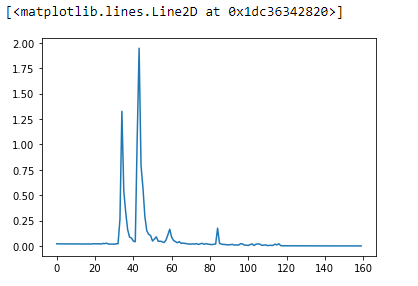

In [5]:
Image(filename='RNN_loss.png') 

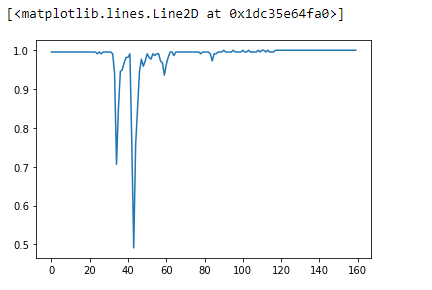

In [6]:
Image(filename='RNN_accuracy.png') 

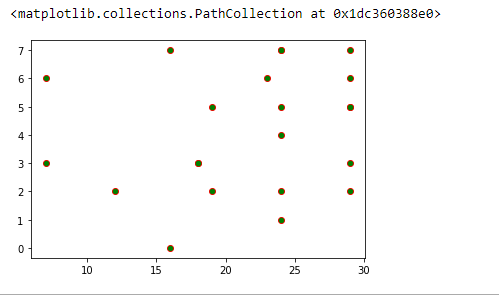

In [7]:
# green is actual value and orange is predicted value
Image(filename='RNN_Scatterplot.png')  

#### LSTM vs RNN Loss

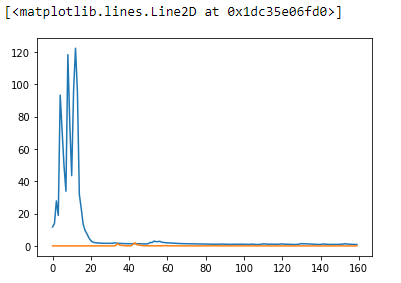

In [8]:
# Blue is LSTM orange is RNN
Image(filename='LSTM vs Rnn loss.png') 

### Show LSTM or RNN performance

In [20]:
def show_performance(model_name='RNN'):  

    if model_name=='LSTM':
        acc=accuracy_lstm

    else:
        model_name='RNN'
        acc=accuracy_rnn
        
        
        
    colors = [(117,245,16), (117,245,16),(117,245,16), (117,245,16),(117,245,16), (117,245,16),(117,245,16), (117,245,16)]
    def perf(y_pred, signs, input_frame, colors):
        output_frame = input_frame.copy()
        cv2.putText(output_frame, model_name+" MODEL", (5, 20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(output_frame, "accuracy="+str(acc), (500, 20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1, cv2.LINE_AA)
        for num, prob in enumerate(y_pred):
            cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
            cv2.putText(output_frame, signs[num], (0, 85+num*40), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 2, cv2.LINE_AA)

        return output_frame
    
    
    cont = []
    line = []
    detections = []

    vis = cv2.VideoCapture(0)

    with holistic_model.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as h_model:
        while vis.isOpened():

            k, image = vis.read()

            image, out = get_feed(image, h_model)

            get_dots(image, out)

            dots = get_dot(out)
            cont.append(dots)
            cont = cont[-30:]

            if len(cont) == 30:
                if model_name=='LSTM':
                    res = lstm.predict(numpy.expand_dims(cont, axis=0))[0]
                    print("Using LSTM")
                    print(signs[numpy.argmax(res)])
                    detections.append(numpy.argmax(res))

                else:
                    res = model_rnn.predict(numpy.expand_dims(cont, axis=0))[0]
                    print("Using RNN")
                    print(signs[numpy.argmax(res)])
                    detections.append(numpy.argmax(res))


                if numpy.unique(detections[-10:])[0]==numpy.argmax(res): 
                    if res[numpy.argmax(res)] > 0.5: 

                        if len(line) > 0: 
                            if signs[numpy.argmax(res)] != line[-1]:
                                line.append(signs[numpy.argmax(res)])
                        else:
                            line.append(signs[numpy.argmax(res)])

                if len(line) > 5: 
                    line = line[-5:]

                image = perf(res, signs, image, colors)

            cv2.imshow('screen', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        vis.release()
        cv2.destroyAllWindows()


In [21]:
def show_performance_with_voice(model_name='RNN'):  

    if model_name=='LSTM':
        acc=accuracy_lstm

    else:
        model_name='RNN'
        acc=accuracy_rnn
        
        
        
    colors = [(117,245,16), (117,245,16),(117,245,16), (117,245,16),(117,245,16), (117,245,16),(117,245,16), (117,245,16)]
    def perf(y_pred, signs, input_frame, colors):
        output_frame = input_frame.copy()
        cv2.putText(output_frame, model_name+" MODEL", (5, 20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(output_frame, "accuracy="+str(acc), (500, 20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1, cv2.LINE_AA)
        for num, prob in enumerate(y_pred):
            cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
            cv2.putText(output_frame, signs[num], (0, 85+num*40), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 2, cv2.LINE_AA)

        return output_frame
    
    
    cont = []
    line = []
    detections = []

    vis = cv2.VideoCapture(0)

    with holistic_model.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as h_model:
        while vis.isOpened():

            k, image = vis.read()

            image, out = get_feed(image, h_model)

            get_dots(image, out)

            dots = get_dot(out)
            cont.append(dots)
            cont = cont[-30:]

            if len(cont) == 30:
                if model_name=='LSTM':
                    res = lstm.predict(numpy.expand_dims(cont, axis=0))[0]
                    print("Using LSTM")
                    print(signs[numpy.argmax(res)])
                    detections.append(numpy.argmax(res))
                    speak = Dispatch("SAPI.SpVoice").Speak
                    speak(signs[numpy.argmax(res)])

                    translator=Translator(to_lang='Spanish')
                    translation=translator.translate(signs[numpy.argmax(res)])
                    print("In Spanish: "+ translation)
                    speak(translation)

                    translator=Translator(to_lang='German')
                    translation=translator.translate(signs[numpy.argmax(res)])
                    print("In German: " +translation)
                    speak(translation)
                else:
                    res = model_rnn.predict(numpy.expand_dims(cont, axis=0))[0]
                    print("Using RNN")
                    print(signs[numpy.argmax(res)])
                    detections.append(numpy.argmax(res))
                    speak = Dispatch("SAPI.SpVoice").Speak
                    speak(signs[numpy.argmax(res)])

                    translator=Translator(to_lang='Spanish')
                    translation=translator.translate(signs[numpy.argmax(res)])
                    print("In Spanish: "+ translation)
                    speak(translation)

                    translator=Translator(to_lang='German')
                    translation=translator.translate(signs[numpy.argmax(res)])
                    print("In German: " +translation)
                    speak(translation)


                if numpy.unique(detections[-10:])[0]==numpy.argmax(res): 
                    if res[numpy.argmax(res)] > 0.5: 

                        if len(line) > 0: 
                            if signs[numpy.argmax(res)] != line[-1]:
                                line.append(signs[numpy.argmax(res)])
                        else:
                            line.append(signs[numpy.argmax(res)])

                if len(line) > 5: 
                    line = line[-5:]

                image = perf(res, signs, image, colors)

            cv2.imshow('screen', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        vis.release()
        cv2.destroyAllWindows()


In [22]:
#opens camera press q to close camera
# to see LSTM performance pass 'LSTM' to the function, to see RNN performance leave it empty or pass 'RNN'
show_performance('LSTM')  

1/1 [==============================] - 1s 1s/step
Using LSTM
ok
1/1 [==============================] - 0s 52ms/step
Using LSTM
ok
1/1 [==============================] - 0s 49ms/step
Using LSTM
ok
1/1 [==============================] - 0s 52ms/step
Using LSTM
ok
1/1 [==============================] - 0s 52ms/step
Using LSTM
ok
1/1 [==============================] - 0s 71ms/step
Using LSTM
ok
1/1 [==============================] - 0s 62ms/step
Using LSTM
ok
1/1 [==============================] - 0s 50ms/step
Using LSTM
ok
1/1 [==============================] - 0s 58ms/step
Using LSTM
ok
1/1 [==============================] - 0s 54ms/step
Using LSTM
ok
1/1 [==============================] - 0s 66ms/step
Using LSTM
ok
1/1 [==============================] - 0s 72ms/step
Using LSTM
ok
1/1 [==============================] - 0s 58ms/step
Using LSTM
ok
1/1 [==============================] - 0s 63ms/step
Using LSTM
ok
1/1 [==============================] - 0s 70ms/step
Using LSTM
ok
1/1 [=======

In [23]:
vis.release()
cv2.destroyAllWindows()

In [ ]:
#opens camera press q to close camera
# to see LSTM performance pass 'LSTM' to the function, to see RNN performance leave it empty or pass 'RNN'
show_performance_with_voice()

In [ ]:
vis.release()
cv2.destroyAllWindows()